In [70]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
plt.rcParams['figure.figsize'] = (5,5)

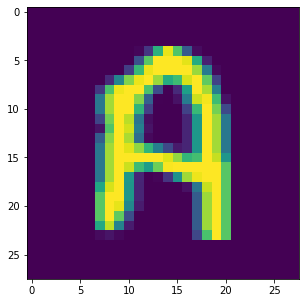

In [120]:
data = pd.read_csv('data.csv', header=None)
data=data.groupby(0,as_index = False,group_keys=False).apply(lambda s: s.sample(1000,replace=True))
target = data[0]
data = data.drop(data.columns[0], axis=1)
img = np.array(data.iloc[0], dtype=np.uint8).reshape(28,28)
plt.imshow(img)

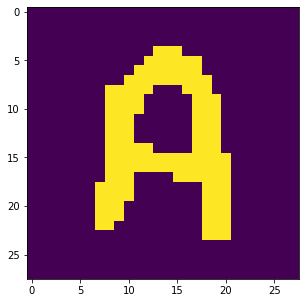

In [121]:
data = data.applymap(lambda x:255 if x>125 else 0)
img = np.array(data.iloc[0], dtype=np.uint8).reshape(28,28)
plt.imshow(img)
plt.show()

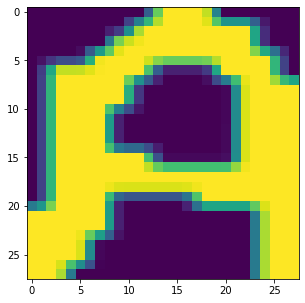

In [122]:
for i in range(len(data)):
    img = np.array(data.iloc[i], dtype=np.uint8).reshape(28,28)
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    boxes = []
    for cont in contours:
        x,y,w,h = cv2.boundingRect(cont)
        boxes.append([x, y, x+w, y+h])
    boxes = np.asarray(boxes)
    left = np.min(boxes[:,0])
    top = np.min(boxes[:,1])
    right = np.max(boxes[:,2])
    bottom = np.max(boxes[:,3])
    rect = (left, top, right-left, bottom-top)
    try:
        img = img[rect[1]:rect[1]+rect[3]-1,rect[0]:rect[0]+rect[2]-1]
        img = cv2.resize(img,(28,28))
    except:
        print(i)
        print(rect)
    data.iloc[i] = (img.flatten())
img = np.array(data.iloc[0], dtype=np.uint8).reshape(28,28)
plt.imshow(img)

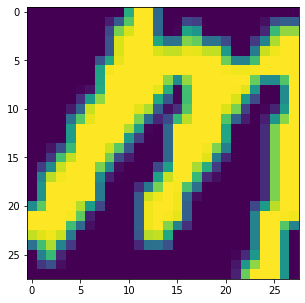

In [126]:
img = np.array(data.iloc[12001], dtype=np.uint8).reshape(28,28)
plt.imshow(img)
plt.show()

In [125]:
X_train, X_test, y_train, y_test = train_test_split(data,target,stratify=target, test_size=0.2)
classNames =['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

The next 4 cells were all generated in seperate runs. My computer does not have nearly enough ram to do it all in one go:

unbalancedUnscaledTree had me import the data as is and run it as is without sampling, scaling, nor binarization

balancedScaledTree had me import and perform all preprocessing on the data (sampling, scaling, and binarization)

balancedUnscaledTree had me import and balance the data without preprocessing it (no scaling or binarization)

unbalancedScaledTree had me import the data as is and run it after preprocessing (sampling, scaling, and binarization)

In [6]:
unbalancedUnscaledTree = DecisionTreeClassifier()
unbalancedUnscaledClassifier = unbalancedUnscaledTree.fit(X_train,y_train)
print('Traning:', unbalancedUnscaledTree.score(X_train, y_train))
print('Testing:', unbalancedUnscaledTree.score(X_test, y_test))

Traning: 1.0
Testing: 0.9554442818595535


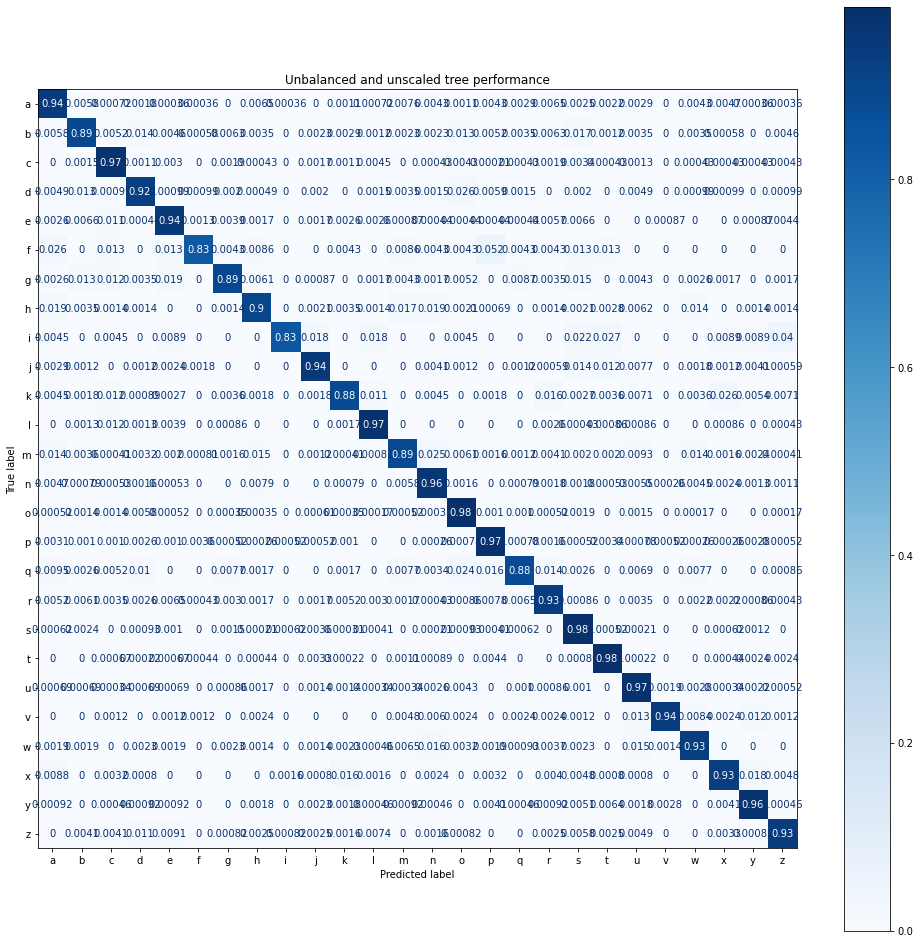

In [58]:
plot = plot_confusion_matrix(unbalancedUnscaledClassifier, X_test,y_test,
display_labels=classNames,cmap=plt.cm.Blues, normalize='true')
plot.ax_.set_title('Unbalanced and unscaled tree performance')
plt.show()

In [12]:
balancedScaledTree = DecisionTreeClassifier()
balancedScaledClassifier = balancedScaledTree.fit(X_train,y_train)
print('Traning:', balancedScaledTree.score(X_train, y_train))
print('Testing:', balancedScaledTree.score(X_test, y_test))

Traning: 1.0
Testing: 0.7909615384615385


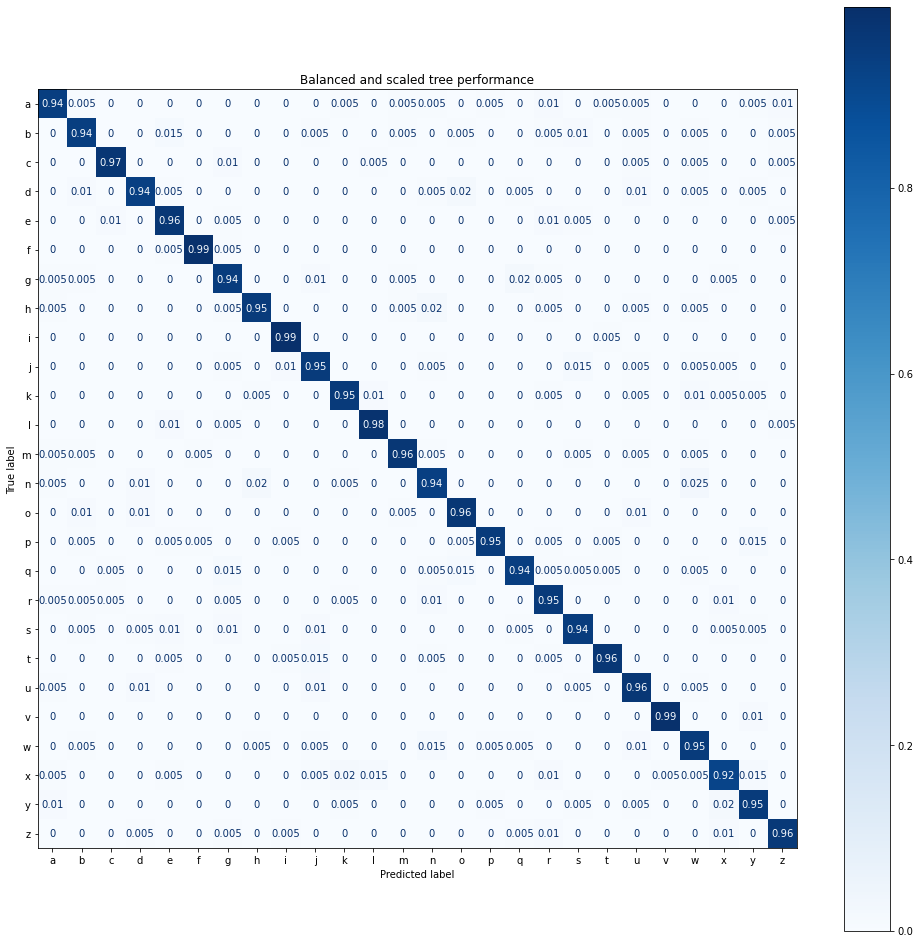

In [36]:
plot = plot_confusion_matrix(balancedScaledClassifier, X_test,y_test,
display_labels=classNames,cmap=plt.cm.Blues, normalize='true')
plot.ax_.set_title('Balanced and scaled tree performance')
plt.show()

In [49]:
balancedUnscaledTree = DecisionTreeClassifier()
balancedUnscaledClassifier = balancedUnscaledTree.fit(X_train,y_train)
print('Traning:', balancedUnscaledTree.score(X_train, y_train))
print('Testing:', balancedUnscaledTree.score(X_test, y_test))

Traning: 1.0
Testing: 0.7378846153846154


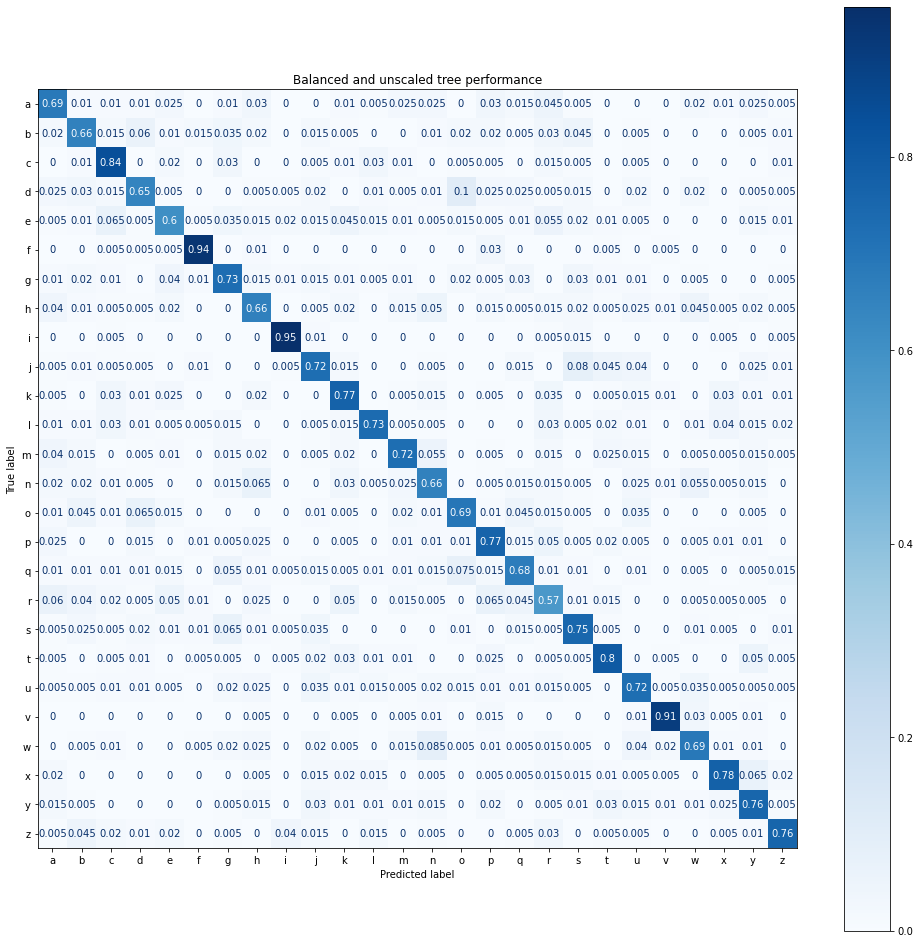

In [50]:
plot = plot_confusion_matrix(balancedUnscaledClassifier, X_test,y_test,
display_labels=classNames,cmap=plt.cm.Blues, normalize='true')
plot.ax_.set_title('Balanced and unscaled tree performance')
plt.show()

In [7]:
unbalancedScaledTree = DecisionTreeClassifier()
unbalancedScaledClassifier = unbalancedScaledTree.fit(X_train,y_train)
print('Traning:', unbalancedScaledTree.score(X_train, y_train))
print('Testing:', unbalancedScaledTree.score(X_test, y_test))

Traning: 1.0
Testing: 0.963686888348928


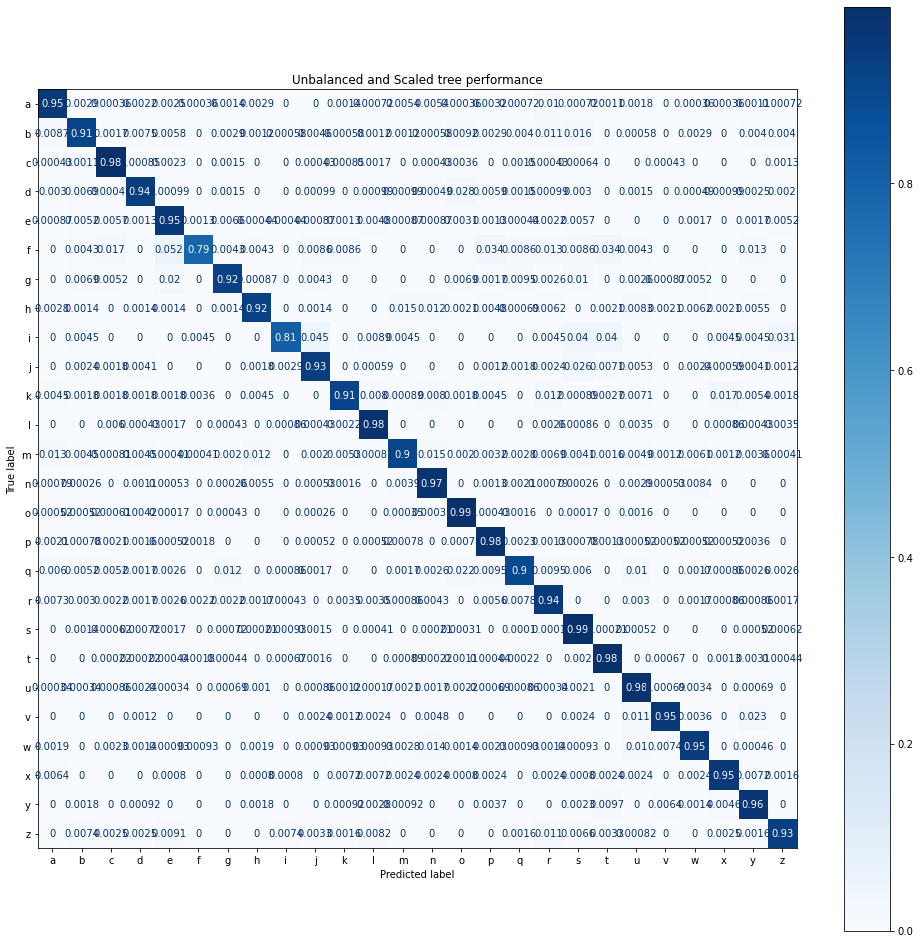

In [8]:
plot = plot_confusion_matrix(unbalancedScaledClassifier, X_test,y_test,
display_labels=classNames,cmap=plt.cm.Blues, normalize='true')
plot.ax_.set_title('Unbalanced and Scaled tree performance')
plt.show()

In [31]:
alphs = [0.000001,0.00001,0.0001,0.001,0.01]
trainingScores = []
testingScores = []
for alpha in alphs:
    forest = RandomForestClassifier(n_estimators=150, criterion='entropy',ccp_alpha=alpha)
    forest.fit(X_train, y_train)
    trainingScores.append(forest.score(X_train, y_train))
    testingScores.append(forest.score(X_test, y_test))
trainingScores, testingScores

([1.0, 1.0, 1.0, 0.9644711538461539, 0.7898076923076923],
 [0.9390384615384615,
  0.941923076923077,
  0.9367307692307693,
  0.9155769230769231,
  0.7761538461538462])

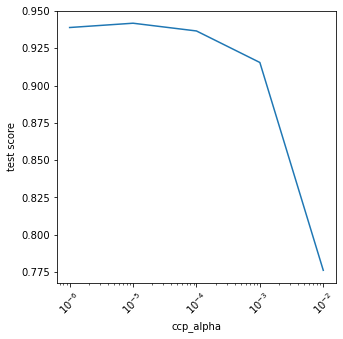

In [32]:
plt.xticks(rotation=45)
plt.xscale('log')
plt.xlabel('ccp_alpha')
plt.ylabel('test score')
plt.plot(alphs, testingScores)

In [33]:
alphs = [0.000008,0.000009,0.00001,0.000011,0.000012]
trainingScores = []
testingScores = []
for alpha in alphs:
    forest = RandomForestClassifier(n_estimators=150, criterion='entropy',ccp_alpha=alpha)
    forest.fit(X_train, y_train)
    trainingScores.append(forest.score(X_train, y_train))
    testingScores.append(forest.score(X_test, y_test))
trainingScores, testingScores

([1.0, 1.0, 1.0, 1.0, 1.0],
 [0.9363461538461538,
  0.9401923076923077,
  0.9394230769230769,
  0.9396153846153846,
  0.9384615384615385])

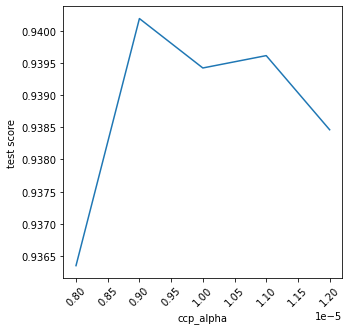

In [34]:
plt.xticks(rotation=45)
plt.xlabel('ccp_alpha')
plt.ylabel('test score')
plt.plot(alphs, testingScores)

In [127]:
forest = RandomForestClassifier(n_estimators=150, criterion='entropy')
forest.fit(X_train, y_train)
score = forest.score(X_test, y_test)
print(score)

0.9388461538461539


In [82]:
forest = RandomForestClassifier(n_estimators=150, criterion='entropy',ccp_alpha=0.000009)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9409615384615385

In [147]:
img = cv2.imread("Sendoff.jpg")
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cv2.imshow('grey', grey)
cv2.imwrite('grey.jpg', grey)
blurred = cv2.GaussianBlur(grey,(9,5),0)
#cv2.imshow('blur', blurred)
ret,thresh = cv2.threshold(blurred,100,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (400,3))
dilation = cv2.dilate(thresh, kernel, iterations=1)
#cv2.imshow('dilation', dilation)
cv2.imwrite('dilation.jpg', dilation)
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
lineContours = sorted(contours, key=lambda cnt:cv2.boundingRect(cnt)[1])
textData = []
overallIdx = 0
for lineIdx, lineContour in enumerate(lineContours):
    lineData = [[]]
    lineX, lineY, lineW, lineH = cv2.boundingRect(lineContour)
    cv2.rectangle(img, (lineX,lineY), (lineX+lineW, lineY+lineH),(255,0,255),2)
    line = thresh[lineY:lineY+lineH, lineX:lineX+lineW]
    lineKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    letterContours, letterHierarchy = cv2.findContours(line, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    letterContours = sorted(letterContours, key=lambda x:cv2.boundingRect(x)[0])
    letterDims = []
    for linepIndex, lineContour in enumerate(letterContours):
        letterX, letterY, letterW, letterH = cv2.boundingRect(lineContour)
        letterDims.append([letterX, letterY, letterW, letterH])
        letters = thresh[lineY+letterY:lineY+letterY+letterH,lineX+letterX:lineX+letterX+letterW]
        
    letter_xpositions, letter_ypositions, letter_widths, letter_heights = list(zip(*letterDims))
    maxPos = letter_xpositions[-1]
    letter_xpositions = [x/maxPos for x in letter_xpositions]
    letter_xpositions = np.reshape(letter_xpositions, (-1,1))
    if len(letter_xpositions) > 2:
        letter_dists = [letter_xpositions[i+1] - (letter_xpositions[i] + letter_widths[i]/maxPos) for i in range(len(letter_xpositions) - 1)]
        avgDist = sum(letter_dists)/len(letter_dists)
        binaryDists = Binarizer(threshold=avgDist*1.5)
        letter_dists = binaryDists.transform(letter_dists)
    colors = [(255, 255, 0),(0, 255, 255), (0, 255, 0), (0, 0, 255)]
    colorIdx = wordIdx = 0
    for i, dim in zip(range(len(letterDims)), letterDims):
        cv2.rectangle(img, (lineX+dim[0],lineY+dim[1]), (lineX+dim[0]+dim[2], lineY+dim[1]+dim[3]),colors[colorIdx],2)
        letterData = thresh[lineY+dim[1]:lineY+dim[1]+dim[3],lineX+dim[0]:lineX+dim[0]+dim[2]]
        letterData = cv2.resize(letterData,dsize=(28,28))
        #cv2.imshow('letter ' +str(overallIdx),letterData)
        overallIdx += 1
        lineData[wordIdx].append(np.reshape(letterData, (1,-1)))
        try:
            if i < len(letter_dists):
                if letter_dists[i] == 1:
                    colorIdx = (colorIdx + 1) % len(colors)
                    lineData.append([])
                    wordIdx += 1
        except:
            pass
    textData.append(lineData)
print('Prediction:')
message = ''
for line in textData:
    for word in line:
        for letter in word:
            message += (chr(65+forest.predict(letter)[0]))
        message += ' '
    message += '\n'
print(message)
#cv2.imshow('first', textData[0])
cv2.imshow('im', img)
cv2.imshow('thresh', thresh)
cv2.imwrite('out.jpg',img)
cv2.imwrite('thresh.jpg',thresh)

cv2.waitKey(0)
cv2.destroyAllWindows()

Prediction:
THANK YOU FOR 
YOUR TIME 

